In [ ]:
def random_combinaation(data):
  random_comb = random.sample(data,len(data))
  return random_comb



In [ ]:
def fitness(data):
    distance = 0
    for i in range(len(data) - 1):
        distance += (((x[data[i]-1] - x[data[i+1]-1])**2) + ((y[data[i]-1] - y[data[i+1]-1])**2)) ** 0.5
    distance += (((x[data[0]-1] - x[data[-1]-1])**2) + ((y[data[0]-1] - y[data[-1]-1])**2)) ** 0.5
    return distance

In [ ]:
import random

def selection(data, selection_size, population):
    selections = []

    while len(selections) < selection_size:
        num1, num2 = random.sample(range(len(data)), 2)  # Fix indexing issue

        # Select the better one based on fitness
        select = num1 if data[num1] < data[num2] else num2

        selections.append(population[select])

    return selections



In [ ]:
def pmx_crossover(parent1, parent2):
    size = len(parent1)

    p1, p2 = sorted(random.sample(range(size), 2))

    # Step 2: Copy the segment from Parent 1 to Offspring 1
    child1 = [-1] * size
    child2 = [-1] * size
    child1[p1:p2] = parent1[p1:p2]
    child2[p1:p2] = parent2[p1:p2]

    # Step 3: Create mappings
    mapping1 = {parent1[i]: parent2[i] for i in range(p1, p2)}
    mapping2 = {parent2[i]: parent1[i] for i in range(p1, p2)}

    def fill_child(child, parent, mapping):
        for i in range(size):
            if child[i] == -1:  # If not filled
                value = parent[i]
                while value in mapping:
                    value = mapping[value]
                child[i] = value

    fill_child(child1, parent2, mapping1)
    fill_child(child2, parent1, mapping2)

    return child1, child2

import random

def crossover(population, crossover_percent):
    cross_population = []
    l = len(population)

    while len(cross_population) < l and len(population) >= 2:

        parent1, parent2 = random.sample(population, 2)

        cross = random.randint(0, 100)

        if cross < crossover_percent:
            child1, child2 = pmx_crossover(parent1, parent2)
            cross_population.append(child1)
            cross_population.append(child2)
        else:
            cross_population.append(parent1)
            cross_population.append(parent2)

        population.remove(parent1)
        population.remove(parent2)

    return cross_population + population


In [ ]:
def mutation(population, mutation_percent):
  mutated_population = []
  l = len(population)

  while(len(mutated_population) < l):
    chromosome = random.randint(0,len(population)-1)
    if(random.randint(0,100) < mutation_percent):
      p1 , p2 = random.sample(range(len(population[0])),2)

      temp = population[chromosome][p1]
      population[chromosome][p1] = population[chromosome][p2]
      population[chromosome][p2] = temp
      mutated_population.append(population[chromosome])
    else:
      mutated_population.append(population[chromosome])
    population.remove(population[chromosome])
  return mutated_population

In [ ]:
def genetic_algorithm(node,x,y,population_size,max_iteration,selection_size,crossvoer_percent,mutation_percent):
  node = node
  x = x
  y = y

  best_solution_fitness = []
  best_chromosome = []

  initial_population = []
  for i in range(population_size):   #this is creating a initial population
    initial_population.append(random_combinaation(node))

  for i in range(max_iteration):
    fitness_score = []
    for j in initial_population:
      fitness_score.append(fitness(j))

    selections  = selection(fitness_score,selection_size,initial_population)

    cross_population = crossover(selections, crossvoer_percent)

    mutated_population = mutation(cross_population,mutation_percent)

    initial_population =  mutated_population

    best =float('inf')
    chromosome = []
    for l in initial_population:
      if fitness(l) < best:
        best = fitness(l)
        chromosome = l

    best_solution_fitness.append(best)
    best_chromosome.append(chromosome)
  return best_solution_fitness , best_chromosome



In [ ]:
import pandas as pd
import random

# Read the text file
with open("/content/tsp1.txt", "r") as file:
    lines = file.readlines()

# Process the data
data = []
for line in lines[1:]:  # Skip the header
    parts = line.split()
    if len(parts) == 3:
        data.append([int(parts[0]), float(parts[1]), float(parts[2])])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["node", "x", "y"])

# Save to CSV
df.to_csv("nodes.csv", index=False)


node = df["node"].tolist()
x = df["x"].tolist()
y = df["y"].tolist()

population_size = 500
max_iteration = 300
selection_size = 100
crossvoer_percent = 80
mutation_percent = 20

best_solutions,best_choromosome = genetic_algorithm(node,x,y,population_size,max_iteration,selection_size,crossvoer_percent,mutation_percent)



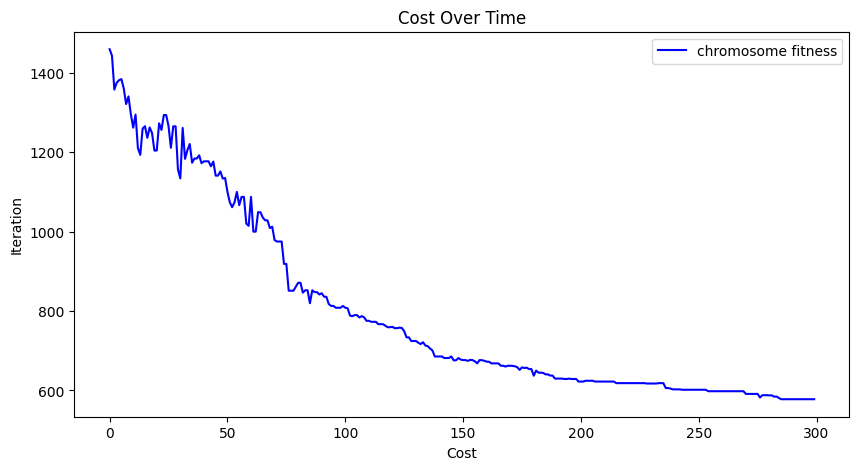

577.7677385824941
[46, 10, 49, 38, 27, 48, 31, 28, 22, 3, 36, 35, 20, 29, 21, 50, 9, 5, 42, 40, 44, 37, 17, 47, 6, 23, 7, 43, 24, 14, 18, 4, 19, 41, 13, 25, 26, 8, 1, 32, 11, 2, 16, 34, 30, 39, 33, 45, 15, 12, 51]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Adjust width (12) and height (5)
plt.plot(best_solutions, linestyle='-', color='b', label="chromosome fitness")

# Add labels and title
plt.xlabel("Cost")
plt.ylabel("Iteration")
plt.title("Cost Over Time")
plt.legend()

# Show the plot
plt.show()

print(best_solutions[-1])
print(best_choromosome[-1])